### PyTorch's Computation Graphs

In [1]:
import torch

In [7]:
def compute_z( a, b, c ):
    r1 = torch.sub(a,b)
    r2 = torch.mul(r1,2)
    z  = torch.add(r2,c)
    return z

In [8]:
compute_z(1,2,3)

tensor(1)

In [10]:
compute_z(torch.tensor(1),torch.tensor(2),torch.tensor(3))

tensor(1)

In [11]:
compute_z(torch.tensor([[1]]),torch.tensor([[2]]),torch.tensor([[3]]))

tensor([[1]])

### Tensors Gradient

In [20]:
a = torch.tensor([3.123,123,321])
print(a.requires_grad)

False


In [21]:
a.requires_grad_()
print(a.requires_grad)

True


The `method_()` methods are in-place functions to increase efficiency.

### Tensors Random Init

In [22]:
import torch.nn as nn

In [32]:
a = torch.empty(2,3)
nn.init.xavier_normal_(a)

tensor([[ 0.3244,  0.2392,  1.0183],
        [ 0.5733, -0.7506,  1.0690]])

In [35]:
class myModule( nn.Module ):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, reqeuire_grad = True )
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, reqeuire_grad = True )
        nn.init.xavier_normal_(self.w2)

### Automatic Diffrentation

In [42]:
w = torch.tensor( (2.0, 3.0), requires_grad = True ) 
b = torch.tensor( 2.0, requires_grad = True ) 
x = torch.randn(2)

In [47]:
z = (x.mul(w)).add(b)
z

tensor([1.0225, 4.9693], grad_fn=<AddBackward0>)

In [56]:
y = torch.tensor( [1.5, 4.3] )

In [60]:
loss = ( y.sub(z) ).pow(2).sum()

In [62]:
loss.backward()
print(f"dL/dw : {w.grad}")
print(f"dL/db : {b.grad}")

dL/dw : tensor([0.4668, 1.3248])
dL/db : 0.38347721099853516


### nn.Sequential

In [ ]:
'''
    In order to bind some nn.modules after each other we can
    use this method. It is a kind of container that will
    execute in a sequential way.
'''

In [64]:
model = nn.Sequential(
    nn.Linear(14,6),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=14, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [75]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()
l1_penalty

tensor(0.6399, grad_fn=<MulBackward0>)

In [76]:
loss_fn = nn.BCELoss()
optim = torch.optim.SGD(lr=0.001, params= model.parameters() )

Z:\python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
gen = np.random.RandomState()

In [117]:
X = gen.normal(loc = 0.0, scale = 2, size = 200)
y = gen.normal(loc = 0.0, scale = 2, size = 200)

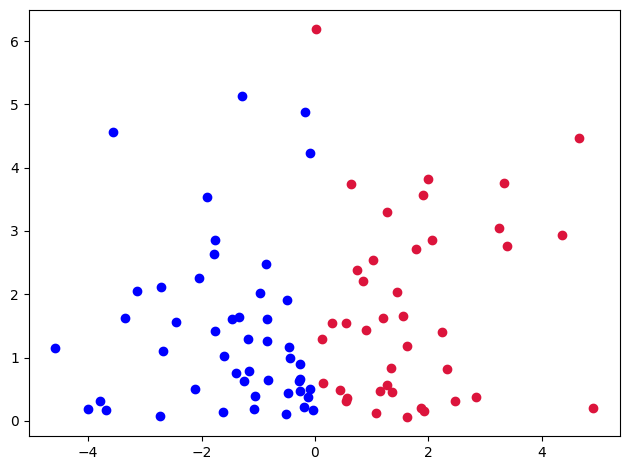

In [119]:
for x_,y_ in zip(X,y):
    if( (x_ > 0 and y_ > 0) or (x_ > 0 and y_ > 0) ):
        plt.scatter( x_ , y_, color = "crimson" )
    elif( (x_ < 0 and y_ > 0) or (x_ > 0 and y_ > 0) ):
        plt.scatter( x_ , y_, color = "blue" )
plt.tight_layout()
plt.show()

In [108]:
plt.scatter( X[X > 0  y > 0] , y[X > 0 and y > 0 ], color = "crimson" )
# plt.scatter( X[X < 0] , y[y < 0], color = "crimson" )
# plt.scatter( X[X > 0] , y[y < 0], color = "blue" )
# plt.scatter( X[X < 0] , y[y > 0], color = "blue" )

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''